In [42]:
import json
import numpy as np
from sklearn.model_selection import train_test_split




In [43]:
with open('test2_embedding.json') as f:
    data = json.load(f)

In [44]:
data_x=[]
data_y=[]
for key in data:
    for embed in data[key]:
        data_x.append(embed)
        data_y.append(key)


In [6]:
tag=list(data.keys())
tag2idx = {t: i for i, t in enumerate(tag)}
idx2tag = {i: t for i, t in enumerate(tag)}
y_t=np.array([tag2idx[i] for i in data_y])



X_train, X_test, y_train, y_test = train_test_split(data_x,data_y,test_size=0.2, random_state=24)
X_test1, X_val, y_test1, y_val = train_test_split(X_test,y_test,test_size=0.5, random_state=24,stratify=y_test)


In [40]:
idx2tag 

{0: 'other/scientific',
 1: 'person/artist',
 2: 'person/title',
 3: 'organization/sports_team',
 4: 'organization/company',
 5: 'other/supernatural',
 6: 'other/product',
 7: 'other/religion',
 8: 'location/city',
 9: 'other/event',
 10: 'location/country',
 11: 'location/geography',
 12: 'other/living_thing',
 13: 'person/political_figure',
 14: 'other/internet',
 15: 'other/award',
 16: 'person/athlete',
 17: 'organization/education',
 18: 'other/art',
 19: 'other/health',
 20: 'other/body_part',
 21: 'person/religious_leader',
 22: 'other/language',
 23: 'location/structure',
 24: 'organization/political_party',
 25: 'organization/military',
 26: 'other/currency',
 27: 'organization/music',
 28: 'other/legal',
 29: 'location/geograpy',
 30: 'location/celestial',
 31: 'other/heritage',
 32: 'organization/government',
 33: 'other/food',
 34: 'organization/stock_exchange',
 35: 'organization/transit',
 36: 'other/sports_and_leisure',
 37: 'person/military',
 38: 'organization/sports_l

In [8]:
from sklearn.neural_network import MLPClassifier
snn_classifier = MLPClassifier(verbose=True,max_iter=300,hidden_layer_sizes=10,batch_size='auto',warm_start=True)
snn_classifier.fit(X_train, y_train)


Iteration 1, loss = 2.60795391
Iteration 2, loss = 1.78666049
Iteration 3, loss = 1.65977731
Iteration 4, loss = 1.61467604
Iteration 5, loss = 1.59018672
Iteration 6, loss = 1.57397405
Iteration 7, loss = 1.56098675
Iteration 8, loss = 1.55156510
Iteration 9, loss = 1.54384210
Iteration 10, loss = 1.53608327
Iteration 11, loss = 1.53200596
Iteration 12, loss = 1.52539412
Iteration 13, loss = 1.52098084
Iteration 14, loss = 1.51530461
Iteration 15, loss = 1.51140866
Iteration 16, loss = 1.50549734
Iteration 17, loss = 1.50292696
Iteration 18, loss = 1.49861266
Iteration 19, loss = 1.49587367
Iteration 20, loss = 1.49203861
Iteration 21, loss = 1.48851943
Iteration 22, loss = 1.48645593
Iteration 23, loss = 1.48458739
Iteration 24, loss = 1.48140210
Iteration 25, loss = 1.47920424
Iteration 26, loss = 1.47792212
Iteration 27, loss = 1.47730977
Iteration 28, loss = 1.47446007
Iteration 29, loss = 1.47449435
Iteration 30, loss = 1.47214296
Iteration 31, loss = 1.47008684
Iteration 32, los

/home/aaloui/.local/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:568: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=10, learning_rate='constant',
              learning_rate_init=0.001, max_iter=300, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=True, warm_start=True)

In [41]:
snn_predictions

array(['other/supernatural', 'person/title', 'person/artist', ...,
       'organization/company', 'other/art', 'person/political_figure'],
      dtype='<U28')

In [9]:
from sklearn.metrics import classification_report
snn_predictions = snn_classifier.predict(X_test)
y_test_t=y_test#[idx2tag[i] for i in y_test]
y_pred_=snn_predictions#[idx2tag[i] for i in snn_predictions]
from sklearn.metrics import f1_score
print('micro f1-score\n')
print(f1_score(y_test_t, y_pred_, average='micro'))
print('macro f1-score\n')
print(f1_score(y_test_t, y_pred_, average='macro'))

print(classification_report(y_test_t,y_pred_ ))

micro f1-score

0.5017749313815187
macro f1-score



/home/aaloui/.local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.2261156046038871


/home/aaloui/.local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


                              precision    recall  f1-score   support

          location/celestial       0.20      0.01      0.02       103
               location/city       0.45      0.41      0.43      1439
            location/country       0.59      0.76      0.67      2526
          location/geography       0.53      0.10      0.16       197
           location/geograpy       0.00      0.00      0.00        11
               location/park       0.00      0.00      0.00         9
          location/structure       0.33      0.18      0.23       597
            location/transit       0.00      0.00      0.00        58
        organization/company       0.59      0.89      0.71      2074
      organization/education       0.64      0.42      0.50       387
     organization/government       0.21      0.01      0.03       271
       organization/military       0.26      0.04      0.07       298
          organization/music       0.14      0.01      0.01       168
organization/politi

In [43]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test_t,y_pred_))

[[  5   3  13 ...   0   0   0]
 [  6 134 112 ...   0   0   5]
 [ 12 121 371 ...   1   1   6]
 ...
 [  0   0   4 ... 213   8  47]
 [  0   1   0 ...  13  17  16]
 [  0   3   3 ...  57  17 549]]


In [5]:
from sklearn.svm import SVC
svm_classifier = SVC(decision_function_shape='ovr',verbose=True)  
svm_classifier.fit(X_train, y_train)
# svm_predictions_labels = svm_classifier.predict(X_test)

/home/aaloui/.local/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[LibSVM]

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=True)

In [8]:
from sklearn.metrics import classification_report
svm = svm_classifier.predict(X_test)
y_test_t=y_test#[idx2tag[i] for i in y_test]
y_pred_=svm#[idx2tag[i] for i in xgb_pred]
from sklearn.metrics import f1_score
print('micro f1-score\n')
print(f1_score(y_test_t, y_pred_, average='micro'))
print('macro f1-score\n')
print(f1_score(y_test_t, y_pred_, average='macro'))

print(classification_report(y_test_t,y_pred_ ))

micro f1-score

0.5840227039429986
macro f1-score



/home/aaloui/.local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.3294668309744984


/home/aaloui/.local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


                              precision    recall  f1-score   support

          location/celestial       1.00      0.16      0.28        62
               location/city       0.56      0.49      0.52       876
            location/country       0.63      0.85      0.72      1513
          location/geography       1.00      0.13      0.23       121
           location/geograpy       0.00      0.00      0.00         8
               location/park       0.00      0.00      0.00         5
          location/structure       0.53      0.23      0.32       343
            location/transit       0.00      0.00      0.00        34
        organization/company       0.61      0.94      0.74      1298
      organization/education       0.98      0.41      0.58       235
     organization/government       0.76      0.15      0.25       164
       organization/military       0.63      0.11      0.18       180
          organization/music       0.86      0.28      0.42       107
organization/politi

In [6]:
from sklearn.svm import SVC
svm1_classifier = SVC(decision_function_shape='ovo',verbose=True)  
svm1_classifier.fit(X_train, y_train)

/home/aaloui/.local/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[LibSVM]

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=True)

In [31]:
from sklearn.externals import joblib
filename = '/svm_classifier.pkl'
joblib.dump(svm1_classifier, filename, compress=9)
clf2 = joblib.load(filename)

NameError: name 'svm1_classifier' is not defined

In [9]:
from sklearn.metrics import classification_report
svm1 = svm1_classifier.predict(X_test)
y_test_t=y_test#[idx2tag[i] for i in y_test]
y_pred_=svm1#[idx2tag[i] for i in xgb_pred]
from sklearn.metrics import f1_score
print('micro f1-score\n')
print(f1_score(y_test_t, y_pred_, average='micro'))
print('macro f1-score\n')
print(f1_score(y_test_t, y_pred_, average='macro'))

print(classification_report(y_test_t,y_pred_ ))

micro f1-score

0.5840227039429986
macro f1-score



/home/aaloui/.local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.3294668309744984


/home/aaloui/.local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


                              precision    recall  f1-score   support

          location/celestial       1.00      0.16      0.28        62
               location/city       0.56      0.49      0.52       876
            location/country       0.63      0.85      0.72      1513
          location/geography       1.00      0.13      0.23       121
           location/geograpy       0.00      0.00      0.00         8
               location/park       0.00      0.00      0.00         5
          location/structure       0.53      0.23      0.32       343
            location/transit       0.00      0.00      0.00        34
        organization/company       0.61      0.94      0.74      1298
      organization/education       0.98      0.41      0.58       235
     organization/government       0.76      0.15      0.25       164
       organization/military       0.63      0.11      0.18       180
          organization/music       0.86      0.28      0.42       107
organization/politi

In [77]:
from sklearn.svm import SVC
svm3_classifier = SVC(kernel='poly',verbose=True)  
svm3_classifier.fit(X_train, y_train)

/home/aaloui/.local/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[LibSVM]

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='poly', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=True)

In [50]:
from sklearn.metrics import classification_report
svm_pred = svm_classifier.predict(X_test)
y_test_t=y_test#[idx2tag[i] for i in y_test]
y_pred_=svm_pred#[idx2tag[i] for i in svm_pred]
from sklearn.metrics import f1_score
print('micro f1-score\n')
print(f1_score(y_test_t, y_pred_, average='micro'))
print('macro f1-score\n')
print(f1_score(y_test_t, y_pred_, average='macro'))

print(classification_report(y_test_t,y_pred_ ))

micro f1-score

0.539284667253005
macro f1-score

0.2624449650953526


/home/aaloui/.local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/aaloui/.local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


                              precision    recall  f1-score   support

          location/celestial       1.00      0.08      0.15        24
               location/city       0.52      0.43      0.47       364
            location/country       0.57      0.84      0.68       655
          location/geography       1.00      0.16      0.28        49
           location/geograpy       0.00      0.00      0.00         5
               location/park       0.00      0.00      0.00         3
          location/structure       0.64      0.12      0.21       170
            location/transit       0.00      0.00      0.00        14
        organization/company       0.57      0.89      0.69       514
      organization/education       0.97      0.35      0.52        88
     organization/government       0.75      0.05      0.09        60
       organization/military       0.43      0.04      0.07        83
          organization/music       1.00      0.17      0.29        35
organization/politi

In [78]:
from xgboost import XGBClassifier
from sklearn.multiclass import OneVsRestClassifier
xgb_classifier = OneVsRestClassifier(XGBClassifier(verbosity=3,max_depth=9))
xgb_classifier.fit(np.array(X_train), y_train)
# xbg_predictions_labels = xgb_classifier.predict(X_test)

[16:54:43] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 0 pruned nodes, max_depth=9
[16:55:15] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 0 pruned nodes, max_depth=9
[16:55:55] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=9
[16:56:58] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=9
[16:58:07] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=9
[16:59:19] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 76 extra nodes, 0 pruned nodes, max_depth=9
[17:00:28] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 94 extra nodes, 0 pruned nodes, max_depth=9
[17:00:59] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 74 extra nod

[17:44:53] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 66 extra nodes, 0 pruned nodes, max_depth=9
[17:45:33] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 68 extra nodes, 0 pruned nodes, max_depth=9
[17:46:15] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 74 extra nodes, 0 pruned nodes, max_depth=9
[17:46:56] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 66 extra nodes, 0 pruned nodes, max_depth=9
[17:47:39] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 66 extra nodes, 0 pruned nodes, max_depth=9
[17:48:22] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 68 extra nodes, 0 pruned nodes, max_depth=9
[17:49:01] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=9
[17:49:44] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nod

[18:23:06] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 306 extra nodes, 0 pruned nodes, max_depth=9
[18:23:51] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 382 extra nodes, 0 pruned nodes, max_depth=9
[18:24:24] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 352 extra nodes, 0 pruned nodes, max_depth=9
[18:25:09] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 236 extra nodes, 0 pruned nodes, max_depth=9
[18:25:42] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 394 extra nodes, 0 pruned nodes, max_depth=9
[18:26:20] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 394 extra nodes, 0 pruned nodes, max_depth=9
[18:27:00] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 216 extra nodes, 0 pruned nodes, max_depth=9
[18:27:31] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 262 e

[18:57:46] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 284 extra nodes, 0 pruned nodes, max_depth=9
[18:58:24] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 322 extra nodes, 0 pruned nodes, max_depth=9
[18:58:59] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 206 extra nodes, 0 pruned nodes, max_depth=9
[18:59:40] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 368 extra nodes, 0 pruned nodes, max_depth=9
[19:00:10] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 100 extra nodes, 0 pruned nodes, max_depth=9
[19:00:44] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 204 extra nodes, 0 pruned nodes, max_depth=9
[19:01:18] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 442 extra nodes, 0 pruned nodes, max_depth=9
[19:01:57] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 334 e

[19:27:13] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 140 extra nodes, 0 pruned nodes, max_depth=9
[19:27:38] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 70 extra nodes, 0 pruned nodes, max_depth=9
[19:28:05] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 102 extra nodes, 0 pruned nodes, max_depth=9
[19:28:30] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 88 extra nodes, 0 pruned nodes, max_depth=9
[19:28:56] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 118 extra nodes, 0 pruned nodes, max_depth=9
[19:29:21] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 144 extra nodes, 0 pruned nodes, max_depth=9
[19:29:45] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 72 extra nodes, 0 pruned nodes, max_depth=9
[19:30:10] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 114 extr

[19:46:44] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 150 extra nodes, 0 pruned nodes, max_depth=9
[19:47:01] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 166 extra nodes, 0 pruned nodes, max_depth=9
[19:47:18] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 164 extra nodes, 0 pruned nodes, max_depth=9
[19:47:35] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 162 extra nodes, 0 pruned nodes, max_depth=9
[19:47:52] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 148 extra nodes, 0 pruned nodes, max_depth=9
[19:48:09] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 164 extra nodes, 0 pruned nodes, max_depth=9
[19:48:26] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 166 extra nodes, 0 pruned nodes, max_depth=9
[19:48:43] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 162 e

[20:02:32] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 72 extra nodes, 0 pruned nodes, max_depth=9
[20:02:45] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 88 extra nodes, 0 pruned nodes, max_depth=9
[20:03:00] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 132 extra nodes, 0 pruned nodes, max_depth=9
[20:03:12] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=9
[20:03:27] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 98 extra nodes, 0 pruned nodes, max_depth=9
[20:03:40] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 84 extra nodes, 0 pruned nodes, max_depth=9
[20:03:53] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 80 extra nodes, 0 pruned nodes, max_depth=9
[20:04:08] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 106 extra n

[20:18:02] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 0 pruned nodes, max_depth=7
[20:18:12] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 0 pruned nodes, max_depth=6
[20:18:24] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 0 pruned nodes, max_depth=6
[20:18:34] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 0 pruned nodes, max_depth=6
[20:18:44] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 0 pruned nodes, max_depth=7
[20:18:53] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 0 pruned nodes, max_depth=6
[20:19:07] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=8
[20:19:18] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nod

[20:28:56] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=9
[20:29:13] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=9
[20:29:30] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=9
[20:29:48] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=9
[20:30:05] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=9
[20:30:23] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=9
[20:30:40] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=9
[20:30:57] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nod

[20:42:39] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=7
[20:42:47] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 0 pruned nodes, max_depth=5
[20:42:55] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=7
[20:43:03] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 0 pruned nodes, max_depth=5
[20:43:10] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=5
[20:43:17] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 0 pruned nodes, max_depth=5
[20:43:25] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=5
[20:43:32] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nod

[20:57:12] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 254 extra nodes, 0 pruned nodes, max_depth=9
[20:57:27] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 86 extra nodes, 0 pruned nodes, max_depth=9
[20:57:43] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 120 extra nodes, 0 pruned nodes, max_depth=9
[20:57:58] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 226 extra nodes, 0 pruned nodes, max_depth=9
[20:58:14] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 216 extra nodes, 0 pruned nodes, max_depth=9
[20:58:29] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 116 extra nodes, 0 pruned nodes, max_depth=9
[20:58:47] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 250 extra nodes, 0 pruned nodes, max_depth=9
[20:59:03] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 86 ext

[21:15:05] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=9
[21:15:23] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=9
[21:15:40] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=9
[21:15:58] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=9
[21:16:15] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=9
[21:16:32] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=9
[21:16:50] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=9
[21:17:07] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nod

[21:31:30] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=9
[21:31:42] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=9
[21:31:53] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=9
[21:32:04] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=9
[21:32:16] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=9
[21:32:27] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 0 pruned nodes, max_depth=9
[21:32:38] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=9
[21:32:49] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nod

[21:47:27] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 344 extra nodes, 0 pruned nodes, max_depth=9
[21:47:44] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 278 extra nodes, 0 pruned nodes, max_depth=9
[21:48:02] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 292 extra nodes, 0 pruned nodes, max_depth=9
[21:48:19] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 390 extra nodes, 0 pruned nodes, max_depth=9
[21:48:37] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 442 extra nodes, 0 pruned nodes, max_depth=9
[21:48:55] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 440 extra nodes, 0 pruned nodes, max_depth=9
[21:49:13] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 426 extra nodes, 0 pruned nodes, max_depth=9
[21:49:31] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 356 e

[22:05:27] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 308 extra nodes, 0 pruned nodes, max_depth=9
[22:05:45] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 374 extra nodes, 0 pruned nodes, max_depth=9
[22:06:03] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 304 extra nodes, 0 pruned nodes, max_depth=9
[22:06:20] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 298 extra nodes, 0 pruned nodes, max_depth=9
[22:06:48] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 180 extra nodes, 0 pruned nodes, max_depth=9
[22:07:05] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 172 extra nodes, 0 pruned nodes, max_depth=9
[22:07:23] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 208 extra nodes, 0 pruned nodes, max_depth=9
[22:07:40] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 184 e

[22:24:03] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 200 extra nodes, 0 pruned nodes, max_depth=9
[22:24:20] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 162 extra nodes, 0 pruned nodes, max_depth=9
[22:24:37] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 184 extra nodes, 0 pruned nodes, max_depth=9
[22:24:52] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 148 extra nodes, 0 pruned nodes, max_depth=9
[22:25:06] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 176 extra nodes, 0 pruned nodes, max_depth=9
[22:25:20] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 150 extra nodes, 0 pruned nodes, max_depth=9
[22:25:35] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 140 extra nodes, 0 pruned nodes, max_depth=9
[22:25:51] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 66 ex

[22:40:59] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 212 extra nodes, 0 pruned nodes, max_depth=9
[22:41:16] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 258 extra nodes, 0 pruned nodes, max_depth=9
[22:41:34] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 268 extra nodes, 0 pruned nodes, max_depth=9
[22:41:51] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 240 extra nodes, 0 pruned nodes, max_depth=9
[22:42:08] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 210 extra nodes, 0 pruned nodes, max_depth=9
[22:42:26] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 246 extra nodes, 0 pruned nodes, max_depth=9
[22:42:43] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 218 extra nodes, 0 pruned nodes, max_depth=9
[22:43:00] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 182 e

[22:57:30] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 68 extra nodes, 0 pruned nodes, max_depth=9
[22:57:44] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 82 extra nodes, 0 pruned nodes, max_depth=9
[22:57:59] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 144 extra nodes, 0 pruned nodes, max_depth=9
[22:58:15] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 110 extra nodes, 0 pruned nodes, max_depth=9
[22:58:30] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 110 extra nodes, 0 pruned nodes, max_depth=9
[22:58:43] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=9
[22:58:57] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 90 extra nodes, 0 pruned nodes, max_depth=9
[22:59:12] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 110 extra

[23:15:16] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 102 extra nodes, 0 pruned nodes, max_depth=9
[23:15:30] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 114 extra nodes, 0 pruned nodes, max_depth=9
[23:15:44] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 204 extra nodes, 0 pruned nodes, max_depth=9
[23:15:59] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=9
[23:16:13] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 172 extra nodes, 0 pruned nodes, max_depth=9
[23:16:26] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 88 extra nodes, 0 pruned nodes, max_depth=9
[23:16:40] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 172 extra nodes, 0 pruned nodes, max_depth=9
[23:16:54] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 178 ex

[23:30:41] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 170 extra nodes, 0 pruned nodes, max_depth=9
[23:30:59] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 160 extra nodes, 0 pruned nodes, max_depth=9
[23:31:16] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 182 extra nodes, 0 pruned nodes, max_depth=9
[23:31:34] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 174 extra nodes, 0 pruned nodes, max_depth=9
[23:31:51] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 176 extra nodes, 0 pruned nodes, max_depth=9
[23:32:08] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 172 extra nodes, 0 pruned nodes, max_depth=9
[23:32:26] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 176 extra nodes, 0 pruned nodes, max_depth=9
[23:32:43] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 168 e

[23:47:48] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 82 extra nodes, 0 pruned nodes, max_depth=9
[23:48:02] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=9
[23:48:16] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 76 extra nodes, 0 pruned nodes, max_depth=9
[23:48:29] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 80 extra nodes, 0 pruned nodes, max_depth=9
[23:48:43] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 78 extra nodes, 0 pruned nodes, max_depth=9
[23:48:56] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=9
[23:49:09] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 76 extra nodes, 0 pruned nodes, max_depth=9
[23:49:24] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 74 extra nod

[00:05:11] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 134 extra nodes, 0 pruned nodes, max_depth=9
[00:05:26] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 134 extra nodes, 0 pruned nodes, max_depth=9
[00:05:41] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 158 extra nodes, 0 pruned nodes, max_depth=9
[00:05:55] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 146 extra nodes, 0 pruned nodes, max_depth=9
[00:06:09] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 80 extra nodes, 0 pruned nodes, max_depth=9
[00:06:22] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 112 extra nodes, 0 pruned nodes, max_depth=9
[00:06:36] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 82 extra nodes, 0 pruned nodes, max_depth=9
[00:06:50] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 ext

[00:19:10] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=9
[00:19:28] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=9
[00:19:45] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=9
[00:20:02] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=9
[00:20:20] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=9
[00:20:38] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=9
[00:20:55] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=9
[00:21:12] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nod

[00:34:34] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=6
[00:34:44] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=7
[00:34:55] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=6
[00:35:05] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=5
[00:35:15] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=6
[00:35:26] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=5
[00:35:34] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=5
[00:35:43] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nod

[00:48:52] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 128 extra nodes, 0 pruned nodes, max_depth=9
[00:49:08] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 146 extra nodes, 0 pruned nodes, max_depth=9
[00:49:24] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 138 extra nodes, 0 pruned nodes, max_depth=9
[00:49:40] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 128 extra nodes, 0 pruned nodes, max_depth=9
[00:49:56] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 152 extra nodes, 0 pruned nodes, max_depth=9
[00:50:13] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=9
[00:50:30] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 128 extra nodes, 0 pruned nodes, max_depth=9
[00:50:44] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 104 e

[01:02:47] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 78 extra nodes, 0 pruned nodes, max_depth=9
[01:03:00] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 88 extra nodes, 0 pruned nodes, max_depth=9
[01:03:16] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 88 extra nodes, 0 pruned nodes, max_depth=9
[01:03:35] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 90 extra nodes, 0 pruned nodes, max_depth=9
[01:03:52] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 100 extra nodes, 0 pruned nodes, max_depth=9
[01:04:09] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 102 extra nodes, 0 pruned nodes, max_depth=9
[01:04:27] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 112 extra nodes, 0 pruned nodes, max_depth=9
[01:04:45] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 104 extra

[01:18:12] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 70 extra nodes, 0 pruned nodes, max_depth=9
[01:18:24] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=9
[01:18:36] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=9
[01:18:48] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=8
[01:18:59] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 64 extra nodes, 0 pruned nodes, max_depth=8
[01:19:11] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=9
[01:19:23] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=9
[01:19:35] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nod

[01:33:35] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=9
[01:33:54] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=9
[01:34:12] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=9
[01:34:30] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=9
[01:34:49] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=9
[01:35:07] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=9
[01:35:25] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=9
[01:35:43] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nod

[01:46:09] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=5
[01:46:17] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 0 pruned nodes, max_depth=6
[01:46:25] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=5
[01:46:34] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=4
[01:46:42] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 0 pruned nodes, max_depth=5
[01:46:50] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=4
[01:46:59] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 0 pruned nodes, max_depth=5
[01:47:06] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nod

[02:05:07] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 354 extra nodes, 0 pruned nodes, max_depth=9
[02:05:26] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 328 extra nodes, 0 pruned nodes, max_depth=9
[02:05:44] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 248 extra nodes, 0 pruned nodes, max_depth=9
[02:06:03] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 434 extra nodes, 0 pruned nodes, max_depth=9
[02:06:22] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 186 extra nodes, 0 pruned nodes, max_depth=9
[02:06:41] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 286 extra nodes, 0 pruned nodes, max_depth=9
[02:07:00] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 178 extra nodes, 0 pruned nodes, max_depth=9
[02:07:20] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 164 e

[02:24:47] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=9
[02:25:05] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=9
[02:25:24] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=9
[02:25:42] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=9
[02:26:00] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=9
[02:26:18] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=9
[02:26:37] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=9
[02:26:55] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nod

[02:40:07] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=6
[02:40:16] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=4
[02:40:24] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=4
[02:40:31] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=4
[02:40:39] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=5
[02:40:47] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=4
[02:40:55] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=5
[02:41:03] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nod

[02:56:31] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 228 extra nodes, 0 pruned nodes, max_depth=9
[02:56:47] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 160 extra nodes, 0 pruned nodes, max_depth=9
[02:57:03] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 300 extra nodes, 0 pruned nodes, max_depth=9
[02:57:19] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 164 extra nodes, 0 pruned nodes, max_depth=9
[02:57:35] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 202 extra nodes, 0 pruned nodes, max_depth=9
[02:57:51] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 174 extra nodes, 0 pruned nodes, max_depth=9
[02:58:06] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 116 extra nodes, 0 pruned nodes, max_depth=9
[02:58:22] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 212 e

[03:14:37] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 234 extra nodes, 0 pruned nodes, max_depth=9
[03:14:55] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 280 extra nodes, 0 pruned nodes, max_depth=9
[03:15:13] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 240 extra nodes, 0 pruned nodes, max_depth=9
[03:15:32] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 262 extra nodes, 0 pruned nodes, max_depth=9
[03:15:50] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 220 extra nodes, 0 pruned nodes, max_depth=9
[03:16:08] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 240 extra nodes, 0 pruned nodes, max_depth=9
[03:16:26] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 246 extra nodes, 0 pruned nodes, max_depth=9
[03:16:45] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 218 e

[03:33:21] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 218 extra nodes, 0 pruned nodes, max_depth=9
[03:33:38] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 104 extra nodes, 0 pruned nodes, max_depth=9
[03:33:55] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 120 extra nodes, 0 pruned nodes, max_depth=9
[03:34:11] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 94 extra nodes, 0 pruned nodes, max_depth=9
[03:34:28] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 102 extra nodes, 0 pruned nodes, max_depth=9
[03:34:45] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 216 extra nodes, 0 pruned nodes, max_depth=9
[03:35:02] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 108 extra nodes, 0 pruned nodes, max_depth=9
[03:35:20] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 220 ex

[03:52:59] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 252 extra nodes, 0 pruned nodes, max_depth=9
[03:53:19] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 344 extra nodes, 0 pruned nodes, max_depth=9
[03:53:37] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 212 extra nodes, 0 pruned nodes, max_depth=9
[03:53:56] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 234 extra nodes, 0 pruned nodes, max_depth=9
[03:54:15] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 230 extra nodes, 0 pruned nodes, max_depth=9
[03:54:34] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 422 extra nodes, 0 pruned nodes, max_depth=9
[03:54:53] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 374 extra nodes, 0 pruned nodes, max_depth=9
[03:55:11] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 302 e

[04:13:30] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 92 extra nodes, 0 pruned nodes, max_depth=9
[04:13:48] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 156 extra nodes, 0 pruned nodes, max_depth=9
[04:14:07] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 156 extra nodes, 0 pruned nodes, max_depth=9
[04:14:25] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=9
[04:14:43] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 130 extra nodes, 0 pruned nodes, max_depth=9
[04:15:01] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 156 extra nodes, 0 pruned nodes, max_depth=9
[04:15:19] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 176 extra nodes, 0 pruned nodes, max_depth=9
[04:15:37] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 192 ex

[04:32:18] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 172 extra nodes, 0 pruned nodes, max_depth=9
[04:32:33] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 72 extra nodes, 0 pruned nodes, max_depth=9
[04:32:49] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 96 extra nodes, 0 pruned nodes, max_depth=9
[04:33:06] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 128 extra nodes, 0 pruned nodes, max_depth=9
[04:33:23] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 162 extra nodes, 0 pruned nodes, max_depth=9
[04:33:39] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 70 extra nodes, 0 pruned nodes, max_depth=9
[04:33:55] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 106 extra nodes, 0 pruned nodes, max_depth=9
[04:34:12] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 176 extr

[04:51:23] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 260 extra nodes, 0 pruned nodes, max_depth=9
[04:51:41] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 194 extra nodes, 0 pruned nodes, max_depth=9
[04:51:58] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 226 extra nodes, 0 pruned nodes, max_depth=9
[04:52:16] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 208 extra nodes, 0 pruned nodes, max_depth=9
[04:52:34] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 202 extra nodes, 0 pruned nodes, max_depth=9
[04:52:53] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 310 extra nodes, 0 pruned nodes, max_depth=9
[04:53:10] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 158 extra nodes, 0 pruned nodes, max_depth=9
[04:53:28] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 350 e

[05:10:56] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 158 extra nodes, 0 pruned nodes, max_depth=9
[05:11:16] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 290 extra nodes, 0 pruned nodes, max_depth=9
[05:11:36] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 146 extra nodes, 0 pruned nodes, max_depth=9
[05:11:57] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 392 extra nodes, 0 pruned nodes, max_depth=9
[05:12:25] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 132 extra nodes, 0 pruned nodes, max_depth=9
[05:12:43] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 162 extra nodes, 0 pruned nodes, max_depth=9
[05:13:01] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 152 extra nodes, 0 pruned nodes, max_depth=9
[05:13:20] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 138 e

[05:30:11] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 136 extra nodes, 0 pruned nodes, max_depth=9
[05:30:28] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 158 extra nodes, 0 pruned nodes, max_depth=9
[05:30:45] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 178 extra nodes, 0 pruned nodes, max_depth=9
[05:31:01] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 112 extra nodes, 0 pruned nodes, max_depth=9
[05:31:21] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 188 extra nodes, 0 pruned nodes, max_depth=9
[05:31:37] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 198 extra nodes, 0 pruned nodes, max_depth=9
[05:31:53] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 176 extra nodes, 0 pruned nodes, max_depth=9
[05:32:09] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 172 e

[05:48:52] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 276 extra nodes, 0 pruned nodes, max_depth=9
[05:49:10] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 270 extra nodes, 0 pruned nodes, max_depth=9
[05:49:28] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 242 extra nodes, 0 pruned nodes, max_depth=9
[05:49:46] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 270 extra nodes, 0 pruned nodes, max_depth=9
[05:50:04] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 274 extra nodes, 0 pruned nodes, max_depth=9
[05:50:28] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 238 extra nodes, 0 pruned nodes, max_depth=9
[05:50:46] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 216 extra nodes, 0 pruned nodes, max_depth=9
[05:51:04] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 246 e

[06:06:01] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 144 extra nodes, 0 pruned nodes, max_depth=9
[06:06:17] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 134 extra nodes, 0 pruned nodes, max_depth=9
[06:06:33] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 88 extra nodes, 0 pruned nodes, max_depth=9
[06:06:49] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 112 extra nodes, 0 pruned nodes, max_depth=9
[06:07:06] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 134 extra nodes, 0 pruned nodes, max_depth=9
[06:07:21] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 142 extra nodes, 0 pruned nodes, max_depth=9
[06:07:39] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 190 extra nodes, 0 pruned nodes, max_depth=9
[06:07:57] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 120 ex

[06:24:43] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 136 extra nodes, 0 pruned nodes, max_depth=9
[06:24:58] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 218 extra nodes, 0 pruned nodes, max_depth=9
[06:25:13] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 196 extra nodes, 0 pruned nodes, max_depth=9
[06:25:27] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 102 extra nodes, 0 pruned nodes, max_depth=9
[06:25:42] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 198 extra nodes, 0 pruned nodes, max_depth=9
[06:25:56] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=9
[06:26:10] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 196 extra nodes, 0 pruned nodes, max_depth=9
[06:26:24] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 146 e

[06:41:34] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=9
[06:41:52] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=9
[06:42:11] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=9
[06:42:29] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 68 extra nodes, 0 pruned nodes, max_depth=9
[06:42:47] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 76 extra nodes, 0 pruned nodes, max_depth=9
[06:43:04] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 82 extra nodes, 0 pruned nodes, max_depth=9
[06:43:22] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 80 extra nodes, 0 pruned nodes, max_depth=9
[06:43:40] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 92 extra nod

[06:58:14] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=9
[06:58:27] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=9
[06:58:40] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=9
[06:58:53] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=9
[06:59:06] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=9
[06:59:19] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=9
[06:59:31] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=9
[06:59:44] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nod

[07:15:42] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 184 extra nodes, 0 pruned nodes, max_depth=9
[07:15:57] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 156 extra nodes, 0 pruned nodes, max_depth=9
[07:16:14] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 214 extra nodes, 0 pruned nodes, max_depth=9
[07:16:29] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=9
[07:16:45] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 296 extra nodes, 0 pruned nodes, max_depth=9
[07:17:01] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 186 extra nodes, 0 pruned nodes, max_depth=9
[07:17:17] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 212 extra nodes, 0 pruned nodes, max_depth=9
[07:17:33] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 352 e

[07:33:57] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 476 extra nodes, 0 pruned nodes, max_depth=9
[07:34:14] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 458 extra nodes, 0 pruned nodes, max_depth=9
[07:34:32] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 438 extra nodes, 0 pruned nodes, max_depth=9
[07:34:49] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 482 extra nodes, 0 pruned nodes, max_depth=9
[07:35:07] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 514 extra nodes, 0 pruned nodes, max_depth=9
[07:35:24] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 404 extra nodes, 0 pruned nodes, max_depth=9
[07:35:41] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 462 extra nodes, 0 pruned nodes, max_depth=9
[07:35:59] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 470 e

[07:52:24] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 130 extra nodes, 0 pruned nodes, max_depth=9
[07:52:40] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 188 extra nodes, 0 pruned nodes, max_depth=9
[07:52:58] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 186 extra nodes, 0 pruned nodes, max_depth=9
[07:53:17] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 294 extra nodes, 0 pruned nodes, max_depth=9
[07:53:36] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 256 extra nodes, 0 pruned nodes, max_depth=9
[07:53:55] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 168 extra nodes, 0 pruned nodes, max_depth=9
[07:54:13] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 284 extra nodes, 0 pruned nodes, max_depth=9
[07:54:29] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 80 ex

[08:11:58] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 186 extra nodes, 0 pruned nodes, max_depth=9
[08:12:15] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 222 extra nodes, 0 pruned nodes, max_depth=9
[08:12:33] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 230 extra nodes, 0 pruned nodes, max_depth=9
[08:12:49] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 226 extra nodes, 0 pruned nodes, max_depth=9
[08:13:06] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 160 extra nodes, 0 pruned nodes, max_depth=9
[08:13:22] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 188 extra nodes, 0 pruned nodes, max_depth=9
[08:13:39] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 260 extra nodes, 0 pruned nodes, max_depth=9
[08:13:54] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 220 e

[08:28:28] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 194 extra nodes, 0 pruned nodes, max_depth=9
[08:28:42] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 166 extra nodes, 0 pruned nodes, max_depth=9
[08:29:01] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 190 extra nodes, 0 pruned nodes, max_depth=9
[08:29:19] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 190 extra nodes, 0 pruned nodes, max_depth=9
[08:29:37] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 202 extra nodes, 0 pruned nodes, max_depth=9
[08:29:55] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 186 extra nodes, 0 pruned nodes, max_depth=9
[08:30:13] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 206 extra nodes, 0 pruned nodes, max_depth=9
[08:30:31] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 218 e

[08:46:45] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 104 extra nodes, 0 pruned nodes, max_depth=9
[08:47:00] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=9
[08:47:15] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 148 extra nodes, 0 pruned nodes, max_depth=9
[08:47:30] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=9
[08:47:45] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 140 extra nodes, 0 pruned nodes, max_depth=9
[08:48:01] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 172 extra nodes, 0 pruned nodes, max_depth=9
[08:48:16] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 92 extra nodes, 0 pruned nodes, max_depth=9
[08:48:31] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 156 ext

[09:04:45] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 110 extra nodes, 0 pruned nodes, max_depth=9
[09:05:03] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 96 extra nodes, 0 pruned nodes, max_depth=9
[09:05:21] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 92 extra nodes, 0 pruned nodes, max_depth=9
[09:05:36] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 82 extra nodes, 0 pruned nodes, max_depth=9
[09:05:51] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 108 extra nodes, 0 pruned nodes, max_depth=9
[09:06:05] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 108 extra nodes, 0 pruned nodes, max_depth=9
[09:06:21] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 78 extra nodes, 0 pruned nodes, max_depth=9
[09:06:35] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 104 extra

[09:19:21] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 0 pruned nodes, max_depth=6
[09:19:33] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=6
[09:19:45] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 0 pruned nodes, max_depth=8
[09:19:57] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 0 pruned nodes, max_depth=7
[09:20:08] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 0 pruned nodes, max_depth=5
[09:20:19] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=6
[09:20:30] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=7
[09:20:41] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nod

[09:54:50] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 164 extra nodes, 0 pruned nodes, max_depth=9
[09:55:30] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 150 extra nodes, 0 pruned nodes, max_depth=9
[09:55:56] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 258 extra nodes, 0 pruned nodes, max_depth=9
[09:56:23] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 302 extra nodes, 0 pruned nodes, max_depth=9
[09:56:52] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 286 extra nodes, 0 pruned nodes, max_depth=9
[09:57:32] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 256 extra nodes, 0 pruned nodes, max_depth=9
[09:58:14] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 238 extra nodes, 0 pruned nodes, max_depth=9
[09:58:58] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 196 e

[10:25:51] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 398 extra nodes, 0 pruned nodes, max_depth=9
[10:26:09] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 436 extra nodes, 0 pruned nodes, max_depth=9
[10:26:27] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 420 extra nodes, 0 pruned nodes, max_depth=9
[10:26:45] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 408 extra nodes, 0 pruned nodes, max_depth=9
[10:27:03] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 334 extra nodes, 0 pruned nodes, max_depth=9
[10:27:21] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 308 extra nodes, 0 pruned nodes, max_depth=9
[10:27:39] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 258 extra nodes, 0 pruned nodes, max_depth=9
[10:27:57] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 286 e

[11:10:07] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 210 extra nodes, 0 pruned nodes, max_depth=9
[11:10:39] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 214 extra nodes, 0 pruned nodes, max_depth=9
[11:11:11] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 290 extra nodes, 0 pruned nodes, max_depth=9
[11:11:42] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 302 extra nodes, 0 pruned nodes, max_depth=9
[11:12:14] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 310 extra nodes, 0 pruned nodes, max_depth=9
[11:12:45] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 136 extra nodes, 0 pruned nodes, max_depth=9
[11:13:18] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 414 extra nodes, 0 pruned nodes, max_depth=9
[11:13:49] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 246 e

[11:32:31] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 116 extra nodes, 0 pruned nodes, max_depth=9
[11:32:47] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 98 extra nodes, 0 pruned nodes, max_depth=9
[11:33:02] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 104 extra nodes, 0 pruned nodes, max_depth=9
[11:33:17] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 100 extra nodes, 0 pruned nodes, max_depth=9
[11:33:32] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 94 extra nodes, 0 pruned nodes, max_depth=9
[11:33:47] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 98 extra nodes, 0 pruned nodes, max_depth=9
[11:34:00] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 118 extra nodes, 0 pruned nodes, max_depth=9
[11:34:12] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 114 extr

[11:44:52] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[11:44:54] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[11:44:56] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[11:44:58] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[11:45:00] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[11:45:02] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[11:45:07] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[11:45:12] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pr

[11:50:16] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[11:50:19] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[11:50:23] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[11:50:27] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[11:50:30] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[11:50:34] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[11:50:38] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[11:50:41] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pr

[12:07:41] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=9
[12:07:58] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=9
[12:08:15] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=9
[12:08:32] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=9
[12:08:49] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=9
[12:09:06] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=8
[12:09:23] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=9
[12:09:40] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nod

[12:18:29] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=4
[12:18:38] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=4
[12:18:48] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=4
[12:18:58] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=4
[12:19:10] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=5
[12:19:21] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=5
[12:19:35] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=7
[12:19:49] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 

[12:38:08] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=4
[12:38:21] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 0 pruned nodes, max_depth=6
[12:38:37] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 0 pruned nodes, max_depth=4
[12:38:50] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=4
[12:39:03] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 0 pruned nodes, max_depth=6
[12:39:15] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=5
[12:39:26] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=4
[12:39:37] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nod

[12:54:06] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 98 extra nodes, 0 pruned nodes, max_depth=9
[12:54:23] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 112 extra nodes, 0 pruned nodes, max_depth=9
[12:54:40] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=9
[12:54:54] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 90 extra nodes, 0 pruned nodes, max_depth=9
[12:55:08] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 104 extra nodes, 0 pruned nodes, max_depth=9
[12:55:22] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 110 extra nodes, 0 pruned nodes, max_depth=9
[12:55:34] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 96 extra nodes, 0 pruned nodes, max_depth=9
[12:55:47] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 100 extr

[13:06:24] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 0 pruned nodes, max_depth=7
[13:06:33] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 0 pruned nodes, max_depth=6
[13:06:44] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 0 pruned nodes, max_depth=8
[13:07:12] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 422 extra nodes, 0 pruned nodes, max_depth=9
[13:07:31] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 446 extra nodes, 0 pruned nodes, max_depth=9
[13:07:49] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 428 extra nodes, 0 pruned nodes, max_depth=9
[13:08:08] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 422 extra nodes, 0 pruned nodes, max_depth=9
[13:08:26] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 440 extr

[13:25:35] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 218 extra nodes, 0 pruned nodes, max_depth=9
[13:25:51] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 264 extra nodes, 0 pruned nodes, max_depth=9
[13:26:07] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 242 extra nodes, 0 pruned nodes, max_depth=9
[13:26:22] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 200 extra nodes, 0 pruned nodes, max_depth=9
[13:26:38] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 164 extra nodes, 0 pruned nodes, max_depth=9
[13:26:53] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 136 extra nodes, 0 pruned nodes, max_depth=9
[13:27:09] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 144 extra nodes, 0 pruned nodes, max_depth=9
[13:27:24] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 134 e

[13:43:58] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 166 extra nodes, 0 pruned nodes, max_depth=9
[13:44:16] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 242 extra nodes, 0 pruned nodes, max_depth=9
[13:44:35] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 188 extra nodes, 0 pruned nodes, max_depth=9
[13:44:53] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 198 extra nodes, 0 pruned nodes, max_depth=9
[13:45:12] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 196 extra nodes, 0 pruned nodes, max_depth=9
[13:45:30] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 216 extra nodes, 0 pruned nodes, max_depth=9
[13:45:48] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 196 extra nodes, 0 pruned nodes, max_depth=9
[13:46:06] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 180 e

[13:59:07] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 72 extra nodes, 0 pruned nodes, max_depth=9
[13:59:20] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 102 extra nodes, 0 pruned nodes, max_depth=9
[13:59:34] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 76 extra nodes, 0 pruned nodes, max_depth=9
[13:59:46] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 74 extra nodes, 0 pruned nodes, max_depth=9
[13:59:59] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 104 extra nodes, 0 pruned nodes, max_depth=9
[14:00:11] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 84 extra nodes, 0 pruned nodes, max_depth=9
[14:00:24] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 74 extra nodes, 0 pruned nodes, max_depth=9
[14:00:37] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 82 extra n

[14:18:25] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 282 extra nodes, 0 pruned nodes, max_depth=9
[14:18:42] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 148 extra nodes, 0 pruned nodes, max_depth=9
[14:19:00] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 252 extra nodes, 0 pruned nodes, max_depth=9
[14:19:17] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 118 extra nodes, 0 pruned nodes, max_depth=9
[14:19:34] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 332 extra nodes, 0 pruned nodes, max_depth=9
[14:19:51] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 164 extra nodes, 0 pruned nodes, max_depth=9
[14:20:09] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 168 extra nodes, 0 pruned nodes, max_depth=9
[14:20:27] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 286 e

OneVsRestClassifier(estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1, gamma=0,
                                            learning_rate=0.1, max_delta_step=0,
                                            max_depth=9, min_child_weight=1,
                                            missing=None, n_estimators=100,
                                            n_jobs=1, nthread=None,
                                            objective='binary:logistic',
                                            random_state=0, reg_alpha=0,
                                            reg_lambda=1, scale_pos_weight=1,
                                            seed=None, silent=None, subsample=1,
                                            verbosity=3),
                    n_jobs=None)

In [79]:
from sklearn.metrics import classification_report
xgb_pred = xgb_classifier.predict(X_test)
y_test_t=y_test#[idx2tag[i] for i in y_test]
y_pred_=xgb_pred#[idx2tag[i] for i in xgb_pred]
from sklearn.metrics import f1_score
print('micro f1-score\n')
print(f1_score(y_test_t, y_pred_, average='micro'))
print('macro f1-score\n')
print(f1_score(y_test_t, y_pred_, average='macro'))

print(classification_report(y_test_t,y_pred_ ))

micro f1-score

0.5771390616508665
macro f1-score

0.31642797705690345


/home/aaloui/.local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/aaloui/.local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


                              precision    recall  f1-score   support

          location/celestial       1.00      0.03      0.06        62
               location/city       0.56      0.47      0.51       876
            location/country       0.61      0.85      0.71      1513
          location/geography       0.78      0.15      0.25       121
           location/geograpy       0.00      0.00      0.00         8
               location/park       0.00      0.00      0.00         5
          location/structure       0.56      0.26      0.35       343
            location/transit       1.00      0.03      0.06        34
        organization/company       0.63      0.93      0.75      1298
      organization/education       0.91      0.45      0.60       235
     organization/government       0.71      0.18      0.28       164
       organization/military       0.55      0.24      0.33       180
          organization/music       0.96      0.24      0.39       107
organization/politi

In [18]:
len(set(y_train))

44

In [114]:
#For Conv1D add Channel
import keras
X_train_ = np.array(X_train).reshape(-1,776,1)
X_test_ = np.array(X_test).reshape(-1,776,1)
X_val_ = np.array(X_val).reshape(-1,776,1)

tag2idx = {t: i for i, t in enumerate(tag)}
idx2tag = {i: t for i, t in enumerate(tag)}
y_train_=np.array([tag2idx[i] for i in y_train])
y_test_=np.array([tag2idx[i] for i in y_test])
y_val_=np.array([tag2idx[i] for i in y_val])

y_train_ = keras.utils.to_categorical(y_train_, len(set(y_train)))
y_test_ = keras.utils.to_categorical(y_test_, len(set(y_train)))
y_val_ = keras.utils.to_categorical(y_val_, len(set(y_train)))
input_shape = (776,1)


In [157]:
# Define model
from keras import models
from keras import layers
from keras import optimizers
from keras.regularizers import l2



model = models.Sequential()
model.add(layers.Flatten(input_shape=input_shape))
model.add(layers.Dense(256, activation='relu', input_dim=input_shape, kernel_regularizer=l2(0.01)))
# model.add(layers.Dropout(0.))
model.add(layers.Dense(44, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_12 (Flatten)         (None, 776)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 256)               198912    
_________________________________________________________________
dense_24 (Dense)             (None, 44)                11308     
Total params: 210,220
Trainable params: 210,220
Non-trainable params: 0
_________________________________________________________________


In [173]:

model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer=optimizers.Adam(),
             metrics=['accuracy'])    
    
# Train model
history = model.fit(X_train_, y_train_, validation_data=[X_val_, y_val_],
             batch_size=024, 
          epochs=1,
          verbose=1)

Train on 66242 samples, validate on 8281 samples
Epoch 1/1
66242/66242 [==============================] - 4s 65us/step - loss: 1.2700 - acc: 0.6400 - val_loss: 1.4912 - val_acc: 0.5741


In [175]:

# Evaluate the model on the test data using `evaluate`
# print('\n# Evaluate on validation data')
# results = model.evaluate(X_test_, y_test_, batch_size=32)
# print('test loss, test acc:', results)

# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
predictions = model.predict(X_test_)
print('predictions shape:', predictions.shape)
from sklearn.metrics import classification_report
y_pred=[np.argmax(predictions[i]) for i in range(len(X_test_))]

y_test_t=y_test#[idx2tag[i] for i in y_test]
y_pred_=[idx2tag[i] for i in y_pred]
from sklearn.metrics import f1_score
print('micro f1-score\n')
print(f1_score(y_test_t, y_pred_, average='micro'))
print('macro f1-score\n')
print(f1_score(y_test_t, y_pred_, average='macro'))

print(classification_report(y_test_t,y_pred_ ))


predictions shape: (16561, 44)
micro f1-score

0.5706177163214782
macro f1-score



/home/aaloui/.local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/aaloui/.local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.3500988770478318
                              precision    recall  f1-score   support

          location/celestial       0.49      0.29      0.36        62
               location/city       0.51      0.49      0.50       876
            location/country       0.64      0.76      0.70      1513
          location/geography       0.51      0.24      0.33       121
           location/geograpy       0.00      0.00      0.00         8
               location/park       0.00      0.00      0.00         5
          location/structure       0.46      0.36      0.40       343
            location/transit       0.50      0.06      0.11        34
        organization/company       0.65      0.90      0.75      1298
      organization/education       0.90      0.44      0.59       235
     organization/government       0.39      0.18      0.25       164
       organization/military       0.40      0.29      0.34       180
          organization/music       0.65      0.36      0.47       107


/home/aaloui/.local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/aaloui/.local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [101]:
from keras.models import load_model

model.save('classifier.h5')  # creates a HDF5 file 'my_model.h5'
del model  # deletes the existing model

# returns a compiled model
# identical to the previous one
model = load_model('classifier.h5')

In [152]:
model = load_model('classifier.h5')

In [154]:
# Define model
from keras import models
from keras import layers
from keras import optimizers
from keras.regularizers import l2



model1 = models.Sequential()
model1.add(layers.Flatten(input_shape=input_shape))
model1.add(layers.Dense(256, activation='relu', input_dim=input_shape, kernel_regularizer=l2(0.01)))
model1.add(layers.Dropout(0.))
model1.add(layers.Dense(44, activation='softmax'))
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_11 (Flatten)         (None, 776)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 256)               198912    
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 44)                11308     
Total params: 210,220
Trainable params: 210,220
Non-trainable params: 0
_________________________________________________________________


In [156]:

model1.compile(loss=keras.losses.categorical_crossentropy,
             optimizer=optimizers.Adam(),
             metrics=['accuracy'])    
    
# Train model
history = model1.fit(X_train_, y_train_,
             batch_size=1024, 
          epochs=100,
          verbose=1)

Epoch 1/100
66242/66242 [==============================] - 3s 51us/step - loss: 1.5403 - acc: 0.5425
Epoch 2/100
66242/66242 [==============================] - 1s 14us/step - loss: 1.5002 - acc: 0.5559
Epoch 3/100
66242/66242 [==============================] - 1s 14us/step - loss: 1.4904 - acc: 0.5538
Epoch 4/100
66242/66242 [==============================] - 1s 14us/step - loss: 1.4751 - acc: 0.5600
Epoch 5/100
66242/66242 [==============================] - 1s 14us/step - loss: 1.4693 - acc: 0.5621
Epoch 6/100
66242/66242 [==============================] - 1s 15us/step - loss: 1.4574 - acc: 0.5670
Epoch 7/100
66242/66242 [==============================] - 1s 14us/step - loss: 1.4558 - acc: 0.5659
Epoch 8/100
66242/66242 [==============================] - 1s 15us/step - loss: 1.4470 - acc: 0.5690
Epoch 9/100
66242/66242 [==============================] - 1s 15us/step - loss: 1.4435 - acc: 0.5720
Epoch 10/100
66242/66242 [==============================] - 1s 15us/step - loss: 1.4402 - a

In [153]:

# Evaluate the model on the test data using `evaluate`
#print('\n# Evaluate on validation data')
#results = model.evaluate(X_test_, y_test_, batch_size=1024)
# print('test loss, test acc:', results)

# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
predictions = model.predict(X_test_)
print('predictions shape:', predictions.shape)
from sklearn.metrics import classification_report
y_pred=[np.argmax(predictions[i]) for i in range(len(X_test_))]

y_test_t=y_test#[idx2tag[i] for i in y_test]
y_pred_=[idx2tag[i] for i in y_pred]
from sklearn.metrics import f1_score
print('micro f1-score\n')
print(f1_score(y_test_t, y_pred_, average='micro'))
print('macro f1-score\n')
print(f1_score(y_test_t, y_pred_, average='macro'))

print(classification_report(y_test_t,y_pred_ ))

predictions shape: (16561, 44)
micro f1-score

0.5595676589577924
macro f1-score

0.35661475696653927


/home/aaloui/.local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/aaloui/.local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


                              precision    recall  f1-score   support

          location/celestial       0.93      0.23      0.36        62
               location/city       0.49      0.58      0.53       876
            location/country       0.69      0.71      0.70      1513
          location/geography       0.57      0.20      0.29       121
           location/geograpy       0.00      0.00      0.00         8
               location/park       1.00      0.20      0.33         5
          location/structure       0.41      0.38      0.39       343
            location/transit       0.50      0.09      0.15        34
        organization/company       0.72      0.81      0.76      1298
      organization/education       0.61      0.58      0.60       235
     organization/government       0.46      0.17      0.25       164
       organization/military       0.33      0.47      0.38       180
          organization/music       0.73      0.35      0.47       107
organization/politi

/home/aaloui/.local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/aaloui/.local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [176]:
#Conv1D Model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Input
from tensorflow.keras import backend as K
input_tensor = Input(shape=(input_shape))
drop_out_rate=0.3
x = layers.Conv1D(128, 3, activation='relu', strides=1)(input_tensor)
x = layers.MaxPooling1D(2)(x)
x = layers.Dropout(drop_out_rate)(x)
x = layers.Conv1D(64, 3,  activation='relu', strides=1)(x)
x = layers.MaxPooling1D(2)(x)
x = layers.Dropout(drop_out_rate)(x)
x = layers.Conv1D(32, 3, activation='relu', strides=1)(x)
x = layers.MaxPooling1D(2)(x)
x = layers.Dropout(drop_out_rate)(x)
x = layers.Flatten()(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(drop_out_rate)(x)
# x = layers.Dense(128, activation='relu')(x)
output_tensor = layers.Dense(len(set(y_train)), activation='softmax')(x)

model = keras.Model(input_tensor, output_tensor)

model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 776, 1)]          0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 774, 128)          512       
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 387, 128)          0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 387, 128)          0         
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 385, 64)           24640     
_________________________________________________________________
max_pooling1d_7 (MaxPooling1 (None, 192, 64)           0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 192, 64)           0   

In [177]:

model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer=keras.optimizers.Adam(),
             metrics=['accuracy'])    
    
# Train model
history = model.fit(X_train_, y_train_, validation_data=[X_val_, y_val_],
             batch_size=512, 
          epochs=30,
          verbose=1)

Train on 66242 samples, validate on 8281 samples
Epoch 1/30
66242/66242 [==============================] - 146s 2ms/sample - loss: 2.5868 - acc: 0.2459 - val_loss: 1.9334 - val_acc: 0.4085
Epoch 2/30
66242/66242 [==============================] - 153s 2ms/sample - loss: 1.9328 - acc: 0.3909 - val_loss: 1.7311 - val_acc: 0.4397
Epoch 3/30
66242/66242 [==============================] - 154s 2ms/sample - loss: 1.8088 - acc: 0.4224 - val_loss: 1.6550 - val_acc: 0.4623
Epoch 4/30
66242/66242 [==============================] - 155s 2ms/sample - loss: 1.7411 - acc: 0.4397 - val_loss: 1.6220 - val_acc: 0.4689
Epoch 5/30
66242/66242 [==============================] - 156s 2ms/sample - loss: 1.6998 - acc: 0.4506 - val_loss: 1.6013 - val_acc: 0.4799
Epoch 6/30
66242/66242 [==============================] - 153s 2ms/sample - loss: 1.6708 - acc: 0.4610 - val_loss: 1.5745 - val_acc: 0.4873
Epoch 7/30
66242/66242 [==============================] - 105s 2ms/sample - loss: 1.6395 - acc: 0.4681 - val_lo

In [179]:

# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
predictions = model.predict(X_test_)
print('predictions shape:', predictions.shape)
from sklearn.metrics import classification_report
y_pred=[np.argmax(predictions[i]) for i in range(len(X_test_))]

y_test_t=y_test#[idx2tag[i] for i in y_test]
y_pred_=[idx2tag[i] for i in y_pred]
from sklearn.metrics import f1_score
print('micro f1-score\n')
print(f1_score(y_test_t, y_pred_, average='micro'))
print('macro f1-score\n')
print(f1_score(y_test_t, y_pred_, average='macro'))

print(classification_report(y_test_t,y_pred_ ))


predictions shape: (16561, 44)
micro f1-score

0.5150655153674295
macro f1-score

0.27881350107952496


/home/aaloui/.local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/aaloui/.local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


                              precision    recall  f1-score   support

          location/celestial       1.00      0.08      0.15        62
               location/city       0.49      0.29      0.36       876
            location/country       0.52      0.87      0.65      1513
          location/geography       1.00      0.13      0.23       121
           location/geograpy       0.00      0.00      0.00         8
               location/park       0.00      0.00      0.00         5
          location/structure       0.36      0.10      0.16       343
            location/transit       1.00      0.03      0.06        34
        organization/company       0.56      0.76      0.65      1298
      organization/education       0.92      0.40      0.55       235
     organization/government       0.56      0.12      0.20       164
       organization/military       0.58      0.06      0.11       180
          organization/music       0.78      0.23      0.36       107
organization/politi

/home/aaloui/.local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/aaloui/.local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [86]:
model1 = keras.Model(input_tensor, output_tensor)

model1.compile(loss=keras.losses.categorical_crossentropy,
             optimizer=keras.optimizers.Adam(),
             metrics=['accuracy'])    
    
# Train model
history = model1.fit(X_train_, y_train_, validation_data=[X_val_, y_val_],
             batch_size=64, 
          epochs=20,
          verbose=1)

Train on 66242 samples, validate on 8281 samples
Epoch 1/20
66242/66242 [==============================] - 239s 4ms/sample - loss: 0.6784 - acc: 0.7621 - val_loss: 2.0685 - val_acc: 0.4882
Epoch 2/20
66242/66242 [==============================] - 232s 4ms/sample - loss: 0.6692 - acc: 0.7663 - val_loss: 2.0810 - val_acc: 0.4842
Epoch 3/20
66242/66242 [==============================] - 232s 4ms/sample - loss: 0.6446 - acc: 0.7757 - val_loss: 2.1409 - val_acc: 0.4844
Epoch 4/20
66242/66242 [==============================] - 231s 3ms/sample - loss: 0.5918 - acc: 0.7903 - val_loss: 2.1983 - val_acc: 0.4809
Epoch 5/20
66242/66242 [==============================] - 231s 3ms/sample - loss: 0.5590 - acc: 0.8050 - val_loss: 2.2127 - val_acc: 0.4772
Epoch 6/20
66242/66242 [==============================] - 231s 3ms/sample - loss: 0.5412 - acc: 0.8109 - val_loss: 2.3277 - val_acc: 0.4832
Epoch 7/20
66242/66242 [==============================] - 228s 3ms/sample - loss: 0.5005 - acc: 0.8244 - val_lo

In [87]:
model2 = keras.Model(input_tensor, output_tensor)

model2.compile(loss=keras.losses.categorical_crossentropy,
             optimizer=keras.optimizers.Adam(),
             metrics=['accuracy'])    
    
# Train model
history = model2.fit(X_train_, y_train_, validation_data=[X_val_, y_val_],
             batch_size=32, 
          epochs=100,
          verbose=1)

Train on 66242 samples, validate on 8281 samples
Epoch 1/100
66242/66242 [==============================] - 248s 4ms/sample - loss: 0.4089 - acc: 0.8607 - val_loss: 2.8386 - val_acc: 0.4662
Epoch 2/100
66242/66242 [==============================] - 247s 4ms/sample - loss: 0.4157 - acc: 0.8565 - val_loss: 2.6261 - val_acc: 0.4706
Epoch 3/100
66242/66242 [==============================] - 247s 4ms/sample - loss: 0.4074 - acc: 0.8593 - val_loss: 2.7176 - val_acc: 0.4699
Epoch 4/100
66242/66242 [==============================] - 248s 4ms/sample - loss: 0.3991 - acc: 0.8627 - val_loss: 2.8535 - val_acc: 0.4667
Epoch 5/100
66242/66242 [==============================] - 246s 4ms/sample - loss: 0.3936 - acc: 0.8653 - val_loss: 2.7640 - val_acc: 0.4706
Epoch 6/100
66242/66242 [==============================] - 247s 4ms/sample - loss: 0.3829 - acc: 0.8681 - val_loss: 2.8098 - val_acc: 0.4743
Epoch 7/100
66242/66242 [==============================] - 248s 4ms/sample - loss: 0.3792 - acc: 0.8710 -

In [ ]:
model3 = keras.Model(input_tensor, output_tensor)

model3.compile(loss=keras.losses.categorical_crossentropy,
             optimizer=keras.optimizers.Adam(),
             metrics=['accuracy'])    
    
# Train model
history = model3.fit(X_train_, y_train_, validation_data=[X_val_, y_val_],
             batch_size=1024, 
          epochs=100,
          verbose=1)

Train on 66242 samples, validate on 8281 samples
Epoch 1/100
66242/66242 [==============================] - 275s 4ms/sample - loss: 0.1275 - acc: 0.9583 - val_loss: 4.5272 - val_acc: 0.4783
Epoch 2/100
66242/66242 [==============================] - 286s 4ms/sample - loss: 0.1018 - acc: 0.9672 - val_loss: 4.5024 - val_acc: 0.4742
Epoch 3/100
66242/66242 [==============================] - 281s 4ms/sample - loss: 0.0928 - acc: 0.9707 - val_loss: 4.5633 - val_acc: 0.4794
Epoch 4/100
66242/66242 [==============================] - 285s 4ms/sample - loss: 0.0914 - acc: 0.9707 - val_loss: 4.5414 - val_acc: 0.4759
Epoch 5/100
66242/66242 [==============================] - 273s 4ms/sample - loss: 0.0817 - acc: 0.9731 - val_loss: 4.6607 - val_acc: 0.4749
Epoch 6/100
66242/66242 [==============================] - 285s 4ms/sample - loss: 0.0790 - acc: 0.9750 - val_loss: 4.4820 - val_acc: 0.4797
Epoch 7/100
66242/66242 [==============================] - 284s 4ms/sample - loss: 0.0795 - acc: 0.9742 -

In [47]:

# Evaluate the model on the test data using `evaluate`
print('\n# Evaluate on validation data')
results = model.evaluate(X_test_, y_test_, batch_size=1024)
# print('test loss, test acc:', results)

# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
predictions = model.predict(X_test_)
print('predictions shape:', predictions.shape)
from sklearn.metrics import classification_report
y_pred=[np.argmax(predictions[i]) for i in range(len(X_test_))]

y_test_t=y_test1#[idx2tag[i] for i in y_test]
y_pred_=[idx2tag[i] for i in y_pred]
from sklearn.metrics import f1_score
print('micro f1-score\n')
print(f1_score(y_test_t, y_pred_, average='micro'))
print('macro f1-score\n')
print(f1_score(y_test_t, y_pred_, average='macro'))

print(classification_report(y_test_t,y_pred_ ))



# Evaluate on validation data
8280/8280 [==============================] - 0s 12us/step
predictions shape: (8280, 44)
micro f1-score

0.5514492753623188
macro f1-score



/home/aaloui/.local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/aaloui/.local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.2861531235791356
                              precision    recall  f1-score   support

          location/celestial       0.00      0.00      0.00        31
               location/city       0.52      0.45      0.48       438
            location/country       0.60      0.82      0.69       756
          location/geography       0.90      0.15      0.25        61
           location/geograpy       0.00      0.00      0.00         4
               location/park       0.00      0.00      0.00         3
          location/structure       0.39      0.23      0.29       171
            location/transit       0.00      0.00      0.00        17
        organization/company       0.62      0.92      0.74       649
      organization/education       0.94      0.44      0.60       117
     organization/government       0.54      0.09      0.15        82
       organization/military       0.61      0.12      0.20        90
          organization/music       0.86      0.22      0.35        54


In [113]:
X_test_[0].shape

(776, 1)

In [46]:
data_mean={}

for key in data.keys():
    data_mean[key]=np.mean(data[key],axis=0)

In [109]:
max(result.items())[1]

0.510386297253003

In [144]:
from scipy import spatial
import operator

result={}
pred=[]
predictions=model.predict(X_test_.reshape(-1,776,1))
y_pred=[np.argmax(predictions[i]) for i in range(len(X_test_))]
pred_=[idx2tag[i] for i in y_pred]

for i in range(len(y_test)):
    
    for key in data_mean.keys():
        
        result[key]=1-spatial.distance.cosine(X_test[i],data_mean[key])
        
    if (max(result.items())[1]> 0.78):
        pred_[i]=max(result.items(), key=operator.itemgetter(1))[0]
#         print(max(result.items(), key=operator.itemgetter(1))[0])


In [145]:
from sklearn.metrics import classification_report
y_test_t=y_test#[idx2tag[i] for i in y_test]
y_pred_=pred#[idx2tag[i] for i in xgb_pred]
from sklearn.metrics import f1_score
print('micro f1-score\n')
print(f1_score(y_test_t, pred_, average='micro'))
print('macro f1-score\n')
print(f1_score(y_test_t, pred_, average='macro'))

print(classification_report(y_test_t,pred_ ))

micro f1-score

0.5296177767043053
macro f1-score



/home/aaloui/.local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.3312578453692571


/home/aaloui/.local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


                              precision    recall  f1-score   support

          location/celestial       0.93      0.23      0.36        62
               location/city       0.49      0.58      0.53       876
            location/country       0.69      0.71      0.70      1513
          location/geography       0.57      0.20      0.29       121
           location/geograpy       0.00      0.00      0.00         8
               location/park       1.00      0.20      0.33         5
          location/structure       0.41      0.38      0.39       343
            location/transit       0.50      0.09      0.15        34
        organization/company       0.72      0.81      0.76      1298
      organization/education       0.61      0.58      0.60       235
     organization/government       0.46      0.17      0.25       164
       organization/military       0.33      0.47      0.38       180
          organization/music       0.73      0.35      0.47       107
organization/politi

/home/aaloui/.local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/aaloui/.local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [141]:
y_pred_=[idx2tag[i] for i in y_pred]

# Evaluate the model on the test data using `evaluate`
print('\n# Evaluate on validation data')
# results = model.evaluate(X_test_, y_test_, batch_size=1024)
# print('test loss, test acc:', results)
# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
predictions = model.predict(X_test_)
print('predictions shape:', predictions.shape)
from sklearn.metrics import classification_report
y_pred=[np.argmax(predictions[i]) for i in range(len(X_test_))]
y_test_t=y_test#[idx2tag[i] for i in y_test]
y_pred_=[idx2tag[i] for i in y_pred]
from sklearn.metrics import f1_score
print('micro f1-score\n')
print(f1_score(y_test_t, y_pred_, average='micro'))
print('macro f1-score\n')
print(f1_score(y_test_t, y_pred_, average='macro'))
print(classification_report(y_test_t,y_pred_ ))



# Evaluate on validation data
predictions shape: (16561, 44)
micro f1-score

0.5595676589577924
macro f1-score



/home/aaloui/.local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.35661475696653927


/home/aaloui/.local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


                              precision    recall  f1-score   support

          location/celestial       0.93      0.23      0.36        62
               location/city       0.49      0.58      0.53       876
            location/country       0.69      0.71      0.70      1513
          location/geography       0.57      0.20      0.29       121
           location/geograpy       0.00      0.00      0.00         8
               location/park       1.00      0.20      0.33         5
          location/structure       0.41      0.38      0.39       343
            location/transit       0.50      0.09      0.15        34
        organization/company       0.72      0.81      0.76      1298
      organization/education       0.61      0.58      0.60       235
     organization/government       0.46      0.17      0.25       164
       organization/military       0.33      0.47      0.38       180
          organization/music       0.73      0.35      0.47       107
organization/politi

/home/aaloui/.local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/aaloui/.local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


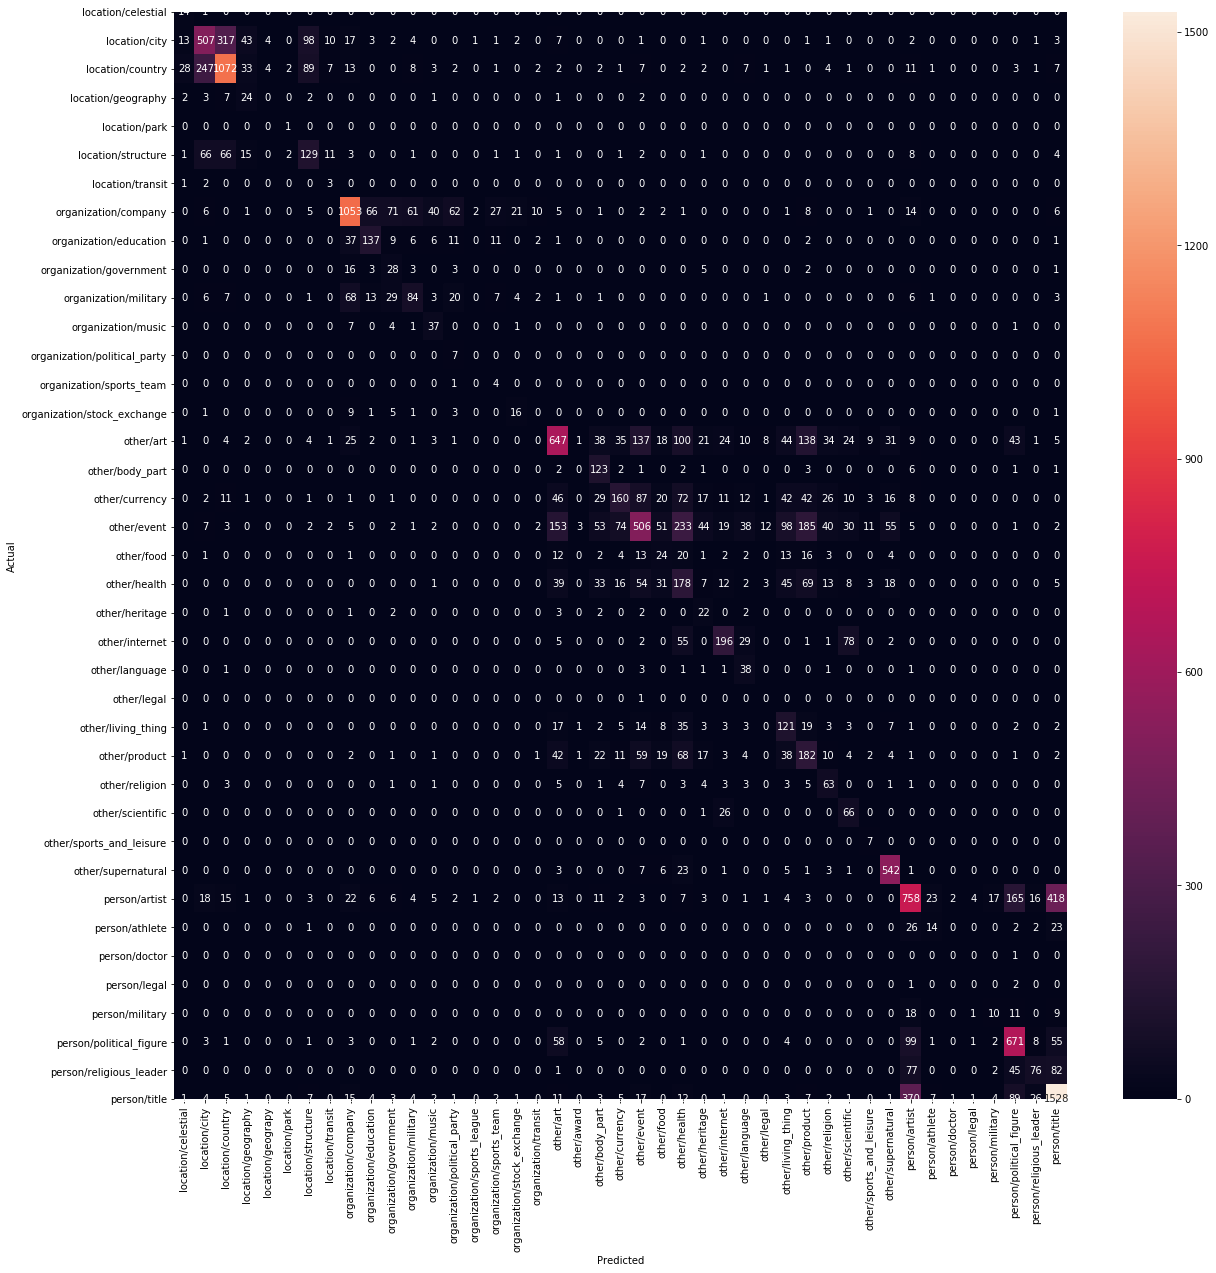

In [136]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=20,20

data = {'y_Predicted': y_test,
        'y_Actual':    pred_
        }

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix, annot=True,fmt='.8g')